In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Cria listas com os caminhos dos arquivos para treinamento, teste e validação
diretorio_treinamento = Path('/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train')
caminhos_treinamento = list(diretorio_treinamento.glob(r'**/*.jpg'))

diretorio_teste = Path('/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/test')
caminhos_teste = list(diretorio_teste.glob(r'**/*.jpg'))

diretorio_validacao = Path('/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/validation')
caminhos_validacao = list(diretorio_validacao.glob(r'**/*.jpg'))

def processar_imagens(caminhos_arquivos):
    """ Cria um DataFrame com os caminhos dos arquivos e os rótulos das imagens """

    # Extrai os rótulos a partir dos caminhos dos arquivos
    rotulos = [str(caminhos_arquivos[i]).split("/")[-2] \
              for i in range(len(caminhos_arquivos))]

    # Cria uma série para os caminhos dos arquivos e outra para os rótulos
    caminhos_arquivos = pd.Series(caminhos_arquivos, name='Caminho').astype(str)
    rotulos = pd.Series(rotulos, name='Rotulo')

    # Concatena os caminhos dos arquivos e os rótulos
    df = pd.concat([caminhos_arquivos, rotulos], axis=1)

    # Embaralha o DataFrame e reseta o índice
    df = df.sample(frac=1).reset_index(drop=True)

    return df

# Processa as imagens de treinamento, teste e validação
df_treinamento = processar_imagens(caminhos_treinamento)
df_teste = processar_imagens(caminhos_teste)
df_validacao = processar_imagens(caminhos_validacao)

# Imprime os DataFrames para verificação
import pprint as pp
pp.pprint(df_treinamento.head())
pp.pprint(df_teste.head())
pp.pprint(df_validacao.head())


                                                                             Caminho  \
0  /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Cucumber/0276.jpg   
1   /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Brinjal/0820.jpg   
2    /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Tomato/0644.jpg   
3    /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Papaya/0528.jpg   
4    /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Papaya/0538.jpg   

     Rotulo  
0  Cucumber  
1   Brinjal  
2    Tomato  
3    Papaya  
4    Papaya  
                                                                                Caminho  \
0          /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/test/Bean/0655.jpg   
1        /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/test/Radish/1082.jpg   
2   /content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/test/Cauliflower/1081.jpg   
3  /content/drive/MyDri

In [16]:

# Define a largura máxima das colunas para exibição
pd.options.display.max_colwidth = 999

# Exibe o DataFrame de treinamento
display(df_treinamento)


,Caminho,Rotulo
0,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Cucumber/0276.jpg,Cucumber
1,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Brinjal/0820.jpg,Brinjal
2,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Tomato/0644.jpg,Tomato
3,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Papaya/0528.jpg,Papaya
4,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Papaya/0538.jpg,Papaya
...,...,...
15005,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Radish/0102.jpg,Radish
15006,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Capsicum/0965.jpg,Capsicum
15007,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Cucumber/0245.jpg,Cucumber
15008,/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/train/Cucumber/0935.jpg,Cucumber


In [17]:
# Exibe informações sobre o conjunto de treinamento
print('-- Conjunto de Treinamento --\n')
print(f'Número de imagens: {df_treinamento.shape[0]}\n')
print(f'Número de rótulos diferentes: {len(df_treinamento.Rotulo.unique())}\n')
print(f'Rótulos: {df_treinamento.Rotulo.unique()}')

-- Conjunto de Treinamento --

Número de imagens: 15010

Número de rótulos diferentes: 15

Rótulos: ['Cucumber' 'Brinjal' 'Tomato' 'Papaya' 'Capsicum' 'Pumpkin' 'Carrot'
 'Bean' 'Radish' 'Cabbage' 'Broccoli' 'Potato' 'Cauliflower'
 'Bitter_Gourd' 'Bottle_Gourd']


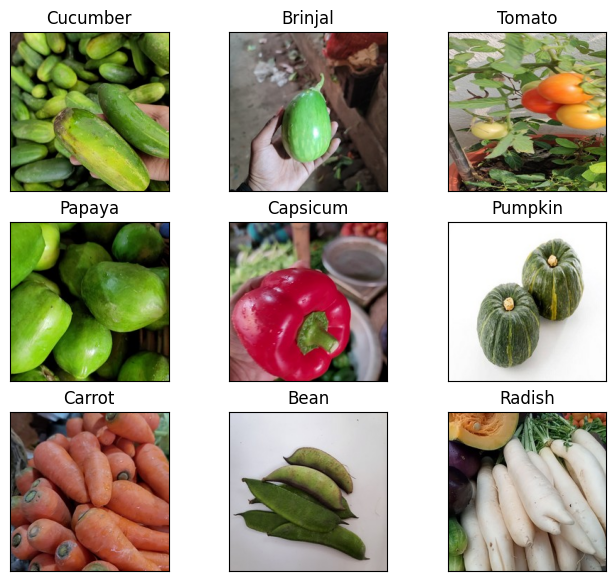

In [18]:
# Cria um DataFrame com um rótulo de cada categoria
df_unico = df_treinamento.copy().drop_duplicates(subset=["Rotulo"]).reset_index()

# Exibe algumas imagens do conjunto de dados
figura, eixos = plt.subplots(nrows=3, ncols=3, figsize=(8, 7),
                            subplot_kw={'xticks': [], 'yticks': []})

numero_imagens_unicas = len(df_unico)
numero_subplots = len(eixos.flat)

if numero_imagens_unicas >= numero_subplots:
    for i, eixo in enumerate(eixos.flat):
        eixo.imshow(plt.imread(df_unico.Caminho[i]))
        eixo.set_title(df_unico.Rotulo[i], fontsize=12)
else:
    print("O número de imagens únicas é menor do que o número de subplots. Não é possível exibir todas as imagens.")


In [19]:
# Cria geradores de imagem para treinamento e teste com funções de pré-processamento
gerador_treinamento = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

gerador_teste = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

imagens_treino = gerador_treinamento.flow_from_dataframe(
    dataframe=df_treinamento,
    x_col='Caminho',
    y_col='Rotulo',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

imagens_validacao = gerador_treinamento.flow_from_dataframe(
    dataframe=df_validacao,
    x_col='Caminho',
    y_col='Rotulo',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

imagens_teste = gerador_teste.flow_from_dataframe(
    dataframe=df_teste,
    x_col='Caminho',
    y_col='Rotulo',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 15010 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.


In [20]:
# Carrega o modelo pré-treinado
modelo_pre_treinado = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
modelo_pre_treinado.trainable = False


9406464/9406464 [==============================] - 0s 0us/step


Train the model

In [21]:
entradas = modelo_pre_treinado.input

camada_intermediaria_1 = tf.keras.layers.Dense(128, activation='relu')(modelo_pre_treinado.output)
camada_intermediaria_2 = tf.keras.layers.Dense(128, activation='relu')(camada_intermediaria_1)

saidas = tf.keras.layers.Dense(15, activation='softmax')(camada_intermediaria_2)

modelo = tf.keras.Model(inputs=entradas, outputs=saidas)

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

historico = modelo.fit(
    imagens_treino,
    validation_data=imagens_validacao,
    batch_size=32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)


Epoch 1/5
470/470 [==============================] - 5001s 11s/step - loss: 0.1143 - accuracy: 0.9732 - val_loss: 0.0160 - val_accuracy: 0.9963
Epoch 2/5
470/470 [==============================] - 825s 2s/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0110 - val_accuracy: 0.9970
Epoch 3/5
470/470 [==============================] - 834s 2s/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0063 - val_accuracy: 0.9977
Epoch 4/5
470/470 [==============================] - 823s 2s/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 5/5
470/470 [==============================] - 944s 2s/step - loss: 1.3776e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9987


In [22]:
historico

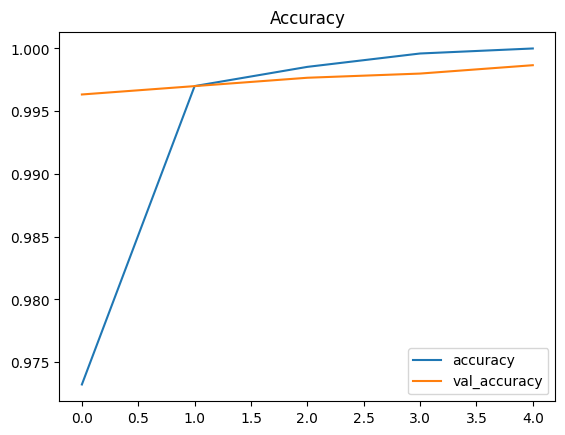

In [25]:
pd.DataFrame(historico.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

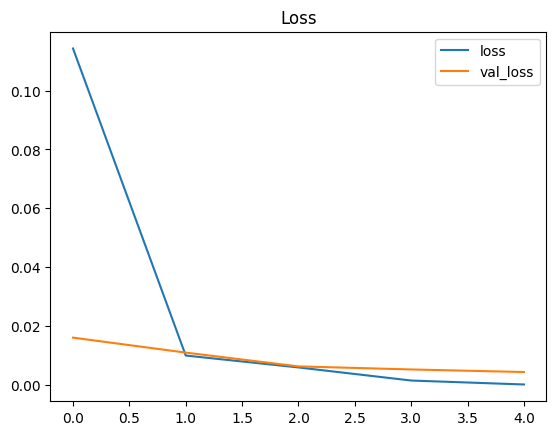

In [26]:
pd.DataFrame(historico.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

Visualize the result

In [27]:
predicoes = modelo.predict(imagens_teste)
predicoes = np.argmax(predicoes, axis=1)

rotulos = (imagens_treino.class_indices)
rotulos = dict((valor, chave) for chave, valor in rotulos.items())
predicoes_mapeadas = [rotulos[k] for k in predicoes]

rotulos_reais = [rotulos[k] for k in imagens_teste.classes]


94/94 [==============================] - 879s 9s/step


Labels

In [28]:
rotulos.items()

dict_items([(0, 'Bean'), (1, 'Bitter_Gourd'), (2, 'Bottle_Gourd'), (3, 'Brinjal'), (4, 'Broccoli'), (5, 'Cabbage'), (6, 'Capsicum'), (7, 'Carrot'), (8, 'Cauliflower'), (9, 'Cucumber'), (10, 'Papaya'), (11, 'Potato'), (12, 'Pumpkin'), (13, 'Radish'), (14, 'Tomato')])

In [29]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(rotulos_reais, predicoes_mapeadas)

print(f'Acurácia no conjunto de teste: {100*acuracia:.2f}%')


Acurácia no conjunto de teste: 99.80%


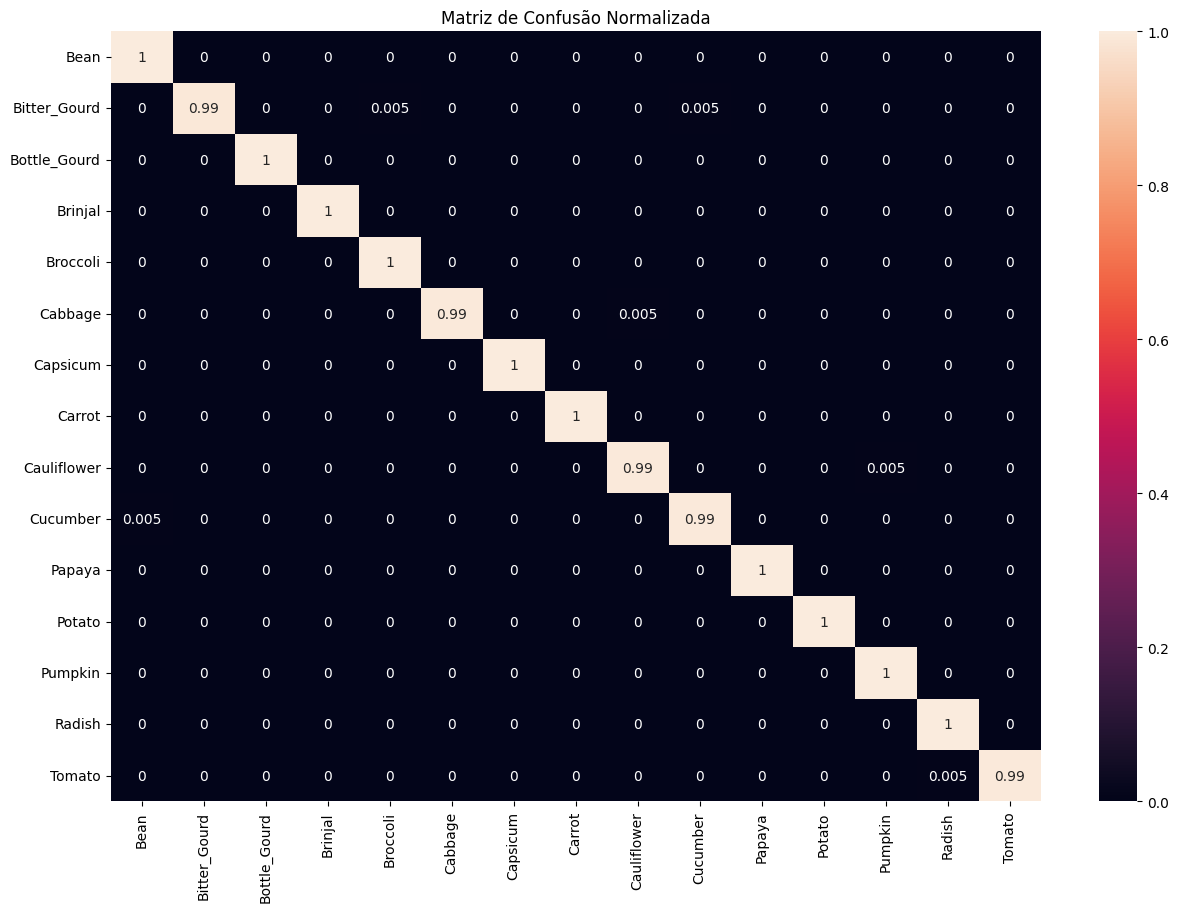

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz_confusao = confusion_matrix(rotulos_reais, predicoes_mapeadas, normalize='true')

plt.figure(figsize=(15, 10))
sns.heatmap(matriz_confusao,
            annot=True,
            xticklabels=sorted(set(rotulos_reais)),
            yticklabels=sorted(set(rotulos_reais))
           )
plt.title('Matriz de Confusão Normalizada')
plt.show()


## 5. Class activation heatmap for image classification<a class="anchor" id="5"></a>
### Grad-CAM class activation visualization
*Code adapted from keras.io*

In [32]:
import matplotlib.cm as cm

def obter_array_imagem(caminho_imagem, tamanho):
    imagem = tf.keras.preprocessing.image.load_img(caminho_imagem, target_size=tamanho)
    array = tf.keras.preprocessing.image.img_to_array(imagem)
    # Adicionamos uma dimensão para transformar nosso array em um "lote" de tamanho "tamanho"
    array = np.expand_dims(array, axis=0)
    return array

def gerar_mapa_calor_gradcam(array_imagem, modelo, nome_ultima_camada_conv, indice_pred=None):
    # Primeiro, criamos um modelo que mapeia a imagem de entrada para as ativações
    # da última camada convolucional, bem como as predições de saída
    modelo_gradcam = tf.keras.models.Model(
        [modelo.inputs], [modelo.get_layer(nome_ultima_camada_conv).output, modelo.output]
    )

    # Em seguida, calculamos o gradiente da classe predita superior para nossa imagem de entrada
    # em relação às ativações da última camada convolucional
    with tf.GradientTape() as fita:
        saida_ultima_camada_conv, predicoes = modelo_gradcam(array_imagem)
        if indice_pred is None:
            indice_pred = tf.argmax(predicoes[0])
        canal_classe = predicoes[:, indice_pred]

    # Este é o gradiente da saída da neurônio (superior previsto ou escolhido)
    # em relação ao mapa de ativação de características da última camada convolucional
    gradientes = fita.gradient(canal_classe, saida_ultima_camada_conv)

    # Este é um vetor onde cada entrada é a intensidade média do gradiente
    # sobre um canal específico do mapa de características
    gradientes_pooled = tf.reduce_mean(gradientes, axis=(0, 1, 2))

    # Multiplicamos cada canal no array do mapa de características
    # por "quão importante este canal é" em relação à classe prevista superior
    # e depois somamos todos os canais para obter a ativação de classe do mapa de calor
    saida_ultima_camada_conv = saida_ultima_camada_conv[0]
    mapa_calor = saida_ultima_camada_conv @ gradientes_pooled[..., tf.newaxis]
    mapa_calor = tf.squeeze(mapa_calor)

    # Para fins de visualização, também normalizaremos o mapa de calor entre 0 e 1
    mapa_calor = tf.maximum(mapa_calor, 0) / tf.math.reduce_max(mapa_calor)
    return mapa_calor.numpy()

def salvar_e_exibir_gradcam(caminho_imagem, mapa_calor, caminho_cam="cam.jpg", alpha=0.4):
    # Carregar a imagem original
    imagem_original = tf.keras.preprocessing.image.load_img(caminho_imagem)
    imagem_original = tf.keras.preprocessing.image.img_to_array(imagem_original)

    # Redimensionar o mapa de calor para uma faixa de 0-255
    mapa_calor = np.uint8(255 * mapa_calor)

    # Usar mapa de cores jet para colorir o mapa de calor
    jet = cm.get_cmap("jet")

    # Usar valores RGB do mapa de cores
    cores_jet = jet(np.arange(256))[:, :3]
    mapa_calor_jet = cores_jet[mapa_calor]

    # Criar uma imagem com o mapa de calor colorido em RGB
    mapa_calor_jet = tf.keras.preprocessing.image.array_to_img(mapa_calor_jet)
    mapa_calor_jet = mapa_calor_jet.resize((imagem_original.shape[1], imagem_original.shape[0]))
    mapa_calor_jet = tf.keras.preprocessing.image.img_to_array(mapa_calor_jet)

    # Sobrepôr o mapa de calor na imagem original
    imagem_sobreposta = mapa_calor_jet * alpha + imagem_original
    imagem_sobreposta = tf.keras.preprocessing.image.array_to_img(imagem_sobreposta)

    # Salvar a imagem sobreposta
    imagem_sobreposta.save(caminho_cam)

    # Exibir Grad CAM
#     display(Image(caminho_cam))

    return caminho_cam

preprocessamento_input = tf.keras.applications.mobilenet_v2.preprocess_input
decodificar_predicoes = tf.keras.applications.mobilenet_v2.decode_predictions

nome_ultima_camada_conv = "Conv_1"
tamanho_imagem = (224,224)

# Remover o softmax da última camada
modelo.layers[-1].ativacao = None


In [33]:
def output(localizacao):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    imagem = load_img(localizacao, target_size=(224, 224, 3))
    imagem_array = img_to_array(imagem)
    imagem_array = imagem_array / 255
    imagem_array = np.expand_dims(imagem_array, [0])
    resposta = modelo.predict(imagem_array)
    classe_predita = resposta.argmax(axis=-1)
    classe_predita = int("".join(str(x) for x in classe_predita))
    resultado = rotulos[classe_predita]
    return resultado


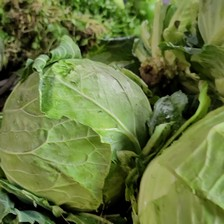

In [34]:
from IPython.display import display
from PIL import Image

localizacao = '/content/drive/MyDrive/Vegetable_Dataset/Vegetable Images/test/Cabbage/1196.jpg'
display(Image.open(localizacao))


In [35]:
imagem = output(localizacao)
imagem

1/1 [==============================] - 1s 1s/step


'Cabbage'

In [36]:
modelo.save('FruitModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
